In [8]:
!pip install pyvis
!pip install neo4j

In [9]:
from neo4j import GraphDatabase
# Neo4j Connection Details
URI = "bolt://35.174.168.97:7687"
AUTH = ("neo4j", "tactic-supplies-retrievals")

# Define Database Class
class Neo4jDatabase:
    def __init__(self, uri, auth):
        self.driver = GraphDatabase.driver(uri, auth=auth)

    def close(self):
        self.driver.close()

    def run_query(self, query):
        with self.driver.session() as session:
            session.run(query)

# Create Instance
db = Neo4jDatabase(URI, AUTH)

In [10]:
import random

employees = [
    "James Wilson (Marketing)", "Sarah Chen (IT)", "Michael Rodriguez (Sales)",
    "Emily Park (HR)", "David Kim (Finance)", "Jessica Brown (Operations)",
    "Robert Taylor (R&D)", "Jennifer Lee (Legal)", "Daniel Martin (Customer Support)",
    "Amanda Johnson (Product)", "Kevin Davis (Logistics)", "Nicole White (Quality)",
    "Thomas Miller (Compliance)", "Rachel Green (Business Dev)", "Christopher Adams (Data)",
    "Michelle Clark (Engineering)", "Matthew Lewis (Design)", "Laura Hall (Security)",
    "Andrew Allen (Content)", "Stephanie Young (Analytics)", "Ryan King (Partnerships)",
    "Megan Scott (Training)", "Joshua Wright (Facilities)", "Olivia Baker (Communications)",
    "Brandon Gonzalez (Procurement)", "Hannah Carter (Innovation)", "Justin Phillips (Strategy)",
    "Samantha Evans (Risk)", "Patrick Collins (Sustainability)", "Katherine Sanders (Diversity)"
]

for emp in employees:
    name, dept = emp.split(" (")
    dept = dept[:-1]
    query = f"""
    CREATE (:Employee {{
        name: '{name}',
        department: '{dept}',
        level: '{random.choice(['Junior', 'Mid', 'Senior', 'Lead'])}',
        tenure: {random.randint(1, 15)}
    }})
    """
    db.run_query(query)

In [11]:
  courses = [
    "Leadership Development", "Agile Methodology", "Data Science Fundamentals",
    "Effective Communication", "Project Management", "Cybersecurity Awareness",
    "Financial Literacy", "Design Thinking", "Emotional Intelligence",
    "Digital Marketing", "Cloud Computing", "Negotiation Skills",
    "Time Management", "Diversity & Inclusion", "Presentation Skills"
]

for course in courses:
    query = f"""
    CREATE (:TrainingCourse {{
        name: '{course}',
        duration_hours: {random.choice([2, 4, 8, 16, 24])},
        format: '{random.choice(['In-person', 'Virtual', 'Hybrid', 'Self-paced'])}'
    }})
    """
    db.run_query(query)


In [12]:
trainers = [
    "Coach Anderson", "Dr. Bennett", "Prof. Carter", "Coach Diaz",
    "Dr. Edwards", "Prof. Foster", "Coach Gray"
]

for trainer in trainers:
    query = f"""
    CREATE (:Trainer {{
        name: '{trainer}',
        specialization: '{random.choice(['Soft Skills', 'Technical', 'Leadership', 'Business'])}',
        years_experience: {random.randint(5, 25)}
    }})
    """
    db.run_query(query)

In [13]:
departments = [
    "Human Resources", "Information Technology", "Sales & Marketing",
    "Finance", "Operations", "Research & Development",
    "Legal", "Customer Experience", "Product Management",
    "Corporate Strategy"
]

for dept in departments:
    query = f"CREATE (:Department {{name: '{dept}'}})"
    db.run_query(query)

In [14]:
for i in range(1, 21):
    room_type = random.choice(['Conference', 'Training', 'Huddle', 'Board'])
    query = f"""
    CREATE (:TrainingRoom {{
        room_id: 'TR-{i:02d}',
        type: '{room_type}',
        capacity: {random.choice([5, 10, 15, 20, 30])}
    }})
    """
    db.run_query(query)

In [15]:
libraries = [
    "Digital Learning Hub", "Technical Resource Center",
    "Leadership Library", "Compliance Knowledge Base",
    "Innovation Portal"
]

for lib in libraries:
    query = f"""
    CREATE (:Library {{
        name: '{lib}',
        access: '{random.choice(['Open', 'Restricted', 'Departmental'])}'
    }})
    """
    db.run_query(query)

In [16]:
resources = [
    "The Lean Startup (Book)", "Scrum Guide (E-book)", "Python for Data Analysis (Video Course)",
    "Crucial Conversations (Audiobook)", "PMP Exam Prep (Online Course)", "GDPR Compliance (Whitepaper)",
    "Financial Modeling (Template)", "Design Patterns (Cheat Sheet)", "Emotional Intelligence 2.0 (Assessment)",
    "SEO Fundamentals (Interactive Module)", "AWS Certified (Practice Tests)", "Getting to Yes (Case Studies)",
    "Deep Work (Book Summary)", "Unconscious Bias (Training Video)", "Storytelling with Data (Workshop Materials)",
    "The Phoenix Project (Book)", "ITIL Foundation (Study Guide)", "Negotiation Tactics (Podcast Series)",
    "Atomic Habits (Workbook)", "Cybersecurity Framework (Policy Template)", "OKRs Guide (Playbook)",
    "Presenting with Impact (Slide Deck)", "Diversity Handbook (PDF)", "Agile Retrospectives (Facilitation Kit)",
    "Time Blocking (Planner)", "Effective Feedback (Assessment Tool)", "Business Model Canvas (Template)",
    "Machine Learning Basics (Jupyter Notebooks)", "Conflict Resolution (Role Play Scenarios)",
    "Growth Mindset (Self-Assessment)", "Public Speaking (Video Library)", "UX Design Principles (Checklist)",
    "Remote Work Best Practices (Guide)", "Data Visualization (Template Pack)", "Customer Journey Mapping (Toolkit)",
    "Leadership Transitions (Case Studies)", "Sales Techniques (Role Play Scripts)", "Team Building (Activity Guide)",
    "Critical Thinking (Workbook)", "Change Management (Playbook)", "Innovation Methods (Card Deck)",
    "Emotional Culture Deck (Tool)", "Strategic Planning (Template)", "Coaching Questions (Cheat Sheet)",
    "Influence Without Authority (Guide)", "Resilience Training (Journal)", "Mindfulness at Work (Audio Guide)",
    "Decision Making (Framework)", "Networking Skills (Playbook)", "Executive Presence (Assessment)"
]

In [17]:
for resource in resources:
    resource_type = resource.split("(")[1][:-1]
    query = f"""
    CREATE (:Resource {{
        title: '{resource.split(' (')[0]}',
        type: '{resource_type}',
        format: '{random.choice(['Digital', 'Physical', 'Hybrid'])}'
    }})
    """
    db.run_query(query)

print("Corporate training network database successfully created!")

Corporate training network database successfully created!


In [18]:
# Create relationships
relationships = [
    ("MATCH (e:Employee), (c:TrainingCourse) WITH e, c ORDER BY rand() LIMIT 40 CREATE (e)-[:ENROLLED_IN]->(c);"),
    ("MATCH (t:Trainer), (c:TrainingCourse) WITH t, c ORDER BY rand() LIMIT 15 CREATE (t)-[:TEACHES]->(c);"),
    ("MATCH (c:TrainingCourse), (d:Department) WITH c, d ORDER BY rand() LIMIT 15 CREATE (c)-[:BELONGS_TO]->(d);"),
    ("MATCH (r:Resource), (l:Library) WITH r, l ORDER BY rand() LIMIT 30 CREATE (r)-[:STORED_IN]->(l);"),
    ("MATCH (e:Employee), (r:Resource) WITH e, r ORDER BY rand() LIMIT 25 CREATE (e)-[:ACCESSED]->(r);"),
    ("MATCH (c:TrainingCourse), (tr:TrainingRoom) WITH c, tr ORDER BY rand() LIMIT 15 CREATE (c)-[:HELD_IN]->(tr);"),
    ("MATCH (t:Trainer), (d:Department) WITH t, d ORDER BY rand() LIMIT 7 CREATE (t)-[:BELONGS_TO]->(d);"),
    ("MATCH (e:Employee), (l:Library) WITH e, l ORDER BY rand() LIMIT 20 CREATE (e)-[:MEMBER_OF]->(l);"),
    ("MATCH (r:Resource), (c:TrainingCourse) WITH r, c ORDER BY rand() LIMIT 25 CREATE (r)-[:RECOMMENDED_FOR]->(c);")
]

for rel in relationships:
    db.run_query(rel)

db.close()

In [23]:
from pyvis.network import Network
from neo4j import GraphDatabase
import pandas as pd

# Connect to Neo4j
uri = "bolt://35.174.168.97:7687"
auth = ("neo4j", "tactic-supplies-retrievals")
driver = GraphDatabase.driver(uri, auth=auth)

def run_query(query):
    with driver.session() as session:
        result = session.run(query)
        return pd.DataFrame([dict(record) for record in result])

# Create a network
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# Get nodes and relationships
nodes_query = """
MATCH (n)
RETURN
  id(n) as id,
  labels(n)[0] as group,
  CASE
    WHEN n.name IS NOT NULL THEN n.name
    WHEN n.title IS NOT NULL THEN n.title
    ELSE labels(n)[0] + ' ' + id(n)
  END as title,
  CASE
    WHEN n.room_id IS NOT NULL THEN n.room_id
    ELSE NULL
  END as label
"""
nodes = run_query(nodes_query)

# Add nodes
for _, node in nodes.iterrows():
    net.add_node(node['id'],
                label=node['label'] if node['label'] else node['title'],
                title=node['title'],
                group=node['group'])

# Get relationships
rels_query = """
MATCH (s)-[r]->(t)
RETURN id(s) as source, id(t) as target, type(r) as label
LIMIT 100
"""
relationships = run_query(rels_query)

# Add edges
for _, rel in relationships.iterrows():
    net.add_edge(rel['source'], rel['target'], title=rel['label'])

# Configure physics for better layout - FIXED JSON SYNTAX
net.set_options("""
{
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -50,
      "centralGravity": 0.01,
      "springLength": 100,
      "springConstant": 0.08
    },
    "maxVelocity": 146,
    "solver": "forceAtlas2Based",
    "timestep": 0.35,
    "stabilization": {
      "iterations": 150
    }
  }
}
""")

# Save and show
net.show("corporate_training_network.html", notebook=False)
driver.close()

corporate_training_network.html


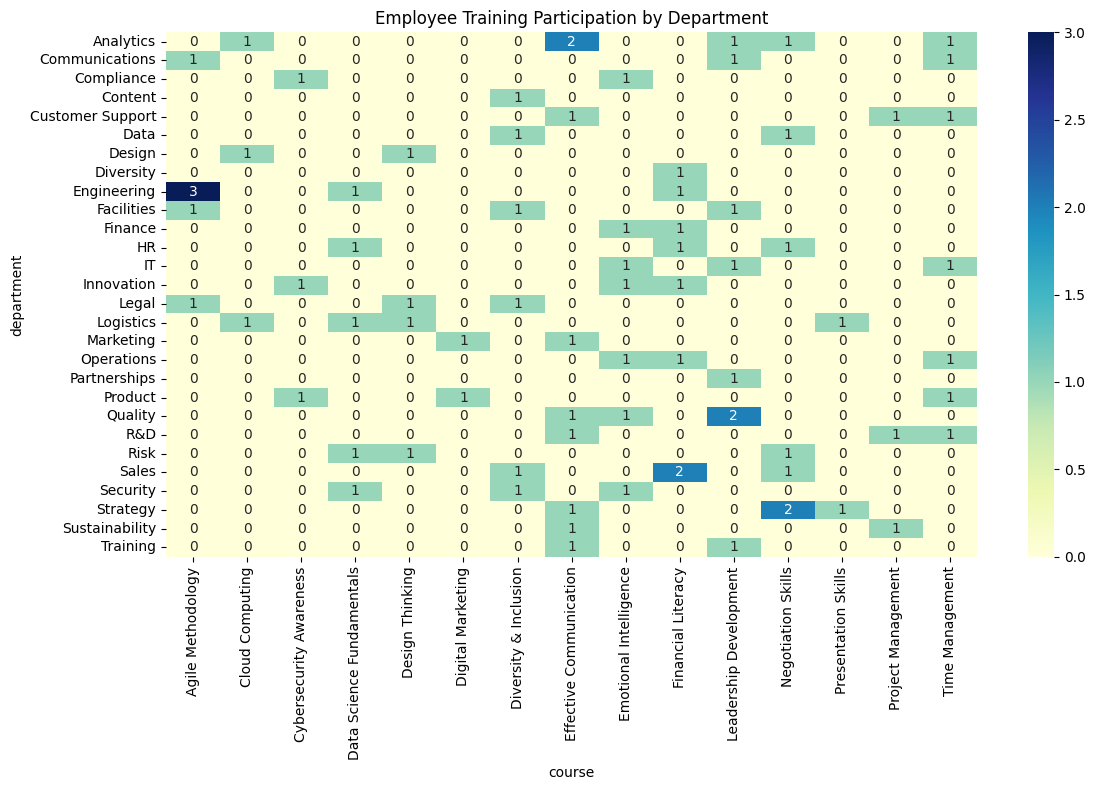

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get employee course participation data
participation_query = """
MATCH (e:Employee)-[:ENROLLED_IN]->(c:TrainingCourse)
RETURN e.department as department, c.name as course, count(*) as count
"""
participation = run_query(participation_query)

# Pivot data for heatmap
heatmap_data = participation.pivot(index='department', columns='course', values='count')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.fillna(0), cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Employee Training Participation by Department")
plt.tight_layout()
plt.show()

<ipython-input-21-cce8a37d6339>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='access_count', y='resource_type', data=resources, palette="Blues_d")


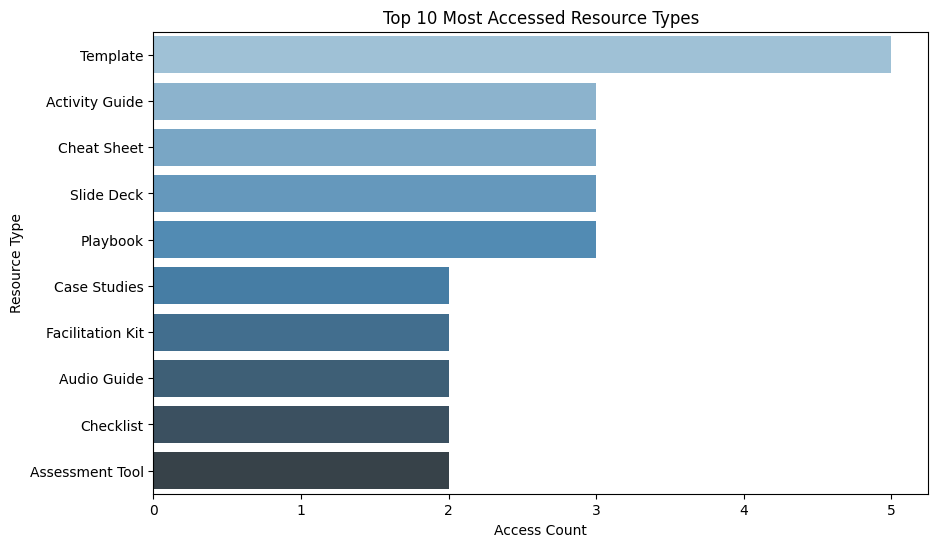

In [21]:
# Get resource access data
resource_query = """
MATCH (e:Employee)-[:ACCESSED]->(r:Resource)
RETURN r.type as resource_type, count(*) as access_count
ORDER BY access_count DESC
LIMIT 10
"""
resources = run_query(resource_query)

plt.figure(figsize=(10, 6))
sns.barplot(x='access_count', y='resource_type', data=resources, palette="Blues_d")
plt.title("Top 10 Most Accessed Resource Types")
plt.xlabel("Access Count")
plt.ylabel("Resource Type")
plt.show()

In [22]:
# Create a focused course network
course_net = Network(height="600px", width="100%", directed=True)

# Get course-centered data
course_query = """
MATCH (c:TrainingCourse)
OPTIONAL MATCH (c)<-[:TEACHES]-(t:Trainer)
OPTIONAL MATCH (c)<-[:RECOMMENDED_FOR]-(r:Resource)
OPTIONAL MATCH (c)-[:BELONGS_TO]->(d:Department)
RETURN c, t, r, d
LIMIT 10
"""
courses = run_query(course_query)

# Add nodes and edges
for _, row in courses.iterrows():
    if row['c']:
        course_net.add_node(row['c'].id, label=row['c']['name'], group='TrainingCourse')
    if row['t']:
        course_net.add_node(row['t'].id, label=row['t']['name'], group='Trainer')
        course_net.add_edge(row['t'].id, row['c'].id, title='TEACHES')
    if row['r']:
        course_net.add_node(row['r'].id, label=row['r']['title'][:20]+"...", group='Resource')
        course_net.add_edge(row['r'].id, row['c'].id, title='RECOMMENDED_FOR')
    if row['d']:
        course_net.add_node(row['d'].id, label=row['d']['name'], group='Department')
        course_net.add_edge(row['c'].id, row['d'].id, title='BELONGS_TO')

course_net.show("course_network.html", notebook=False)

course_network.html


<ipython-input-22-38af48b37f4c>:18: DeprecationWarning: `id` is deprecated, use `element_id` instead
  course_net.add_node(row['c'].id, label=row['c']['name'], group='TrainingCourse')
<ipython-input-22-38af48b37f4c>:20: DeprecationWarning: `id` is deprecated, use `element_id` instead
  course_net.add_node(row['t'].id, label=row['t']['name'], group='Trainer')
<ipython-input-22-38af48b37f4c>:21: DeprecationWarning: `id` is deprecated, use `element_id` instead
  course_net.add_edge(row['t'].id, row['c'].id, title='TEACHES')
<ipython-input-22-38af48b37f4c>:23: DeprecationWarning: `id` is deprecated, use `element_id` instead
  course_net.add_node(row['r'].id, label=row['r']['title'][:20]+"...", group='Resource')
<ipython-input-22-38af48b37f4c>:24: DeprecationWarning: `id` is deprecated, use `element_id` instead
  course_net.add_edge(row['r'].id, row['c'].id, title='RECOMMENDED_FOR')
<ipython-input-22-38af48b37f4c>:26: DeprecationWarning: `id` is deprecated, use `element_id` instead
  course